<a href="https://colab.research.google.com/github/Deepak-Mewada/TensorFlowAdvancedTechniquesSpecialization_DeeplearningAI/blob/main/C1/W1/TF2C1W1L1_Functional_API_Practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TF2C1 : Custom Models, Layers, and Loss Functions with TensorFlow

## W1 Functional API Practice

In [ ]:
# importing tensorflow
import tensorflow as tf

In [ ]:
#importing necessary functions

from tensorflow.keras.layers import Input

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(128,activation='relu'),
    tf.keras.layers.Dense(10,activation='softmax')
])



### Step1 : Input

In [ ]:
#defining input (1st deviation from the sequential API)
input = Input(shape= (28,28))

### Step *2* : Layers

In [ ]:
#import the necessary function fro defining the layers
from tensorflow.keras.layers import Flatten, Dense

In [ ]:
# defing the layers

x = Flatten()(input)
x = Dense(128,activation="relu")(x)
predictions = Dense(10, activation= "softmax")(x)




### Step3: Defining the model

In [ ]:
#importing the modle function

from tensorflow.keras.models import Model

In [ ]:
#@title Default title text
#calling the model

func_model= Model(inputs = input, outputs = predictions)



In [ ]:
#@title Plot model graph

#importting necessary function

from tensorflow.keras.utils import plot_model



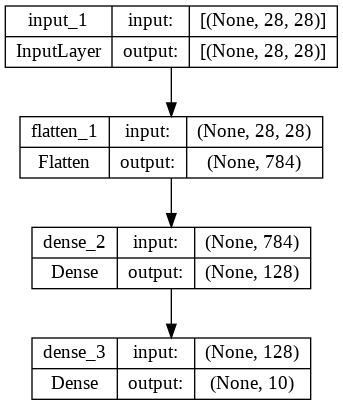

In [ ]:
plot_model(func_model, show_shapes=True, to_file='model.png')

## Making Individual Functions

In [ ]:
#@title Sequential API

def build_model_with_sequential():

  #instantiate a Sequential class and linearly stack the layers of the model
  seq_model = tf.keras.Sequential([
      tf.keras.layers.Flatten(input_shape = (28,28)),
      tf.keras.layers.Dense(128,activation= 'relu'),
      tf.keras.layers.Dense(10,activation = 'softmax')
  ])

  return seq_model

In [ ]:
#@title Functional API

def build_model_with_functional_API():

  #instantiate the input tensor
  input = Input(shape = (28,28))

  #Stack the layers using the syantax : new_layer()(previous_layer)
  flatten     = tf.keras.layers.Flatten()(input)
  dense_layer = tf.keras.layers.Dense(128, activation = 'relu')(flatten)
  predictions = tf.keras.layers.Dense(10, activation = 'softmax')(dense_layer)

  # declare the inpouts and outputs
  func_model = Model(inputs= input , outputs = predictions)

  return func_model


In [ ]:
#@title Build the model and visualize the modle graph

seq_model = build_model_with_sequential()
func_model = build_model_with_functional_API()

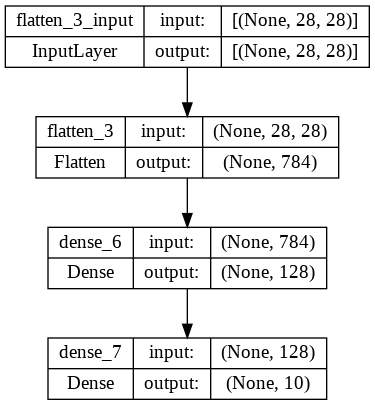

In [ ]:
plot_model(seq_model,show_shapes= True) 

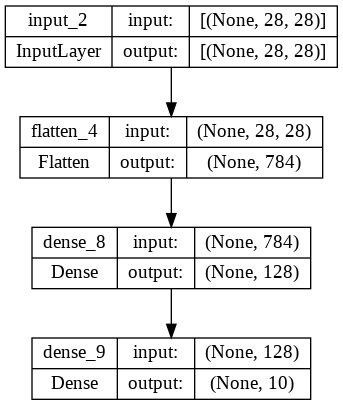

In [ ]:
plot_model(func_model,show_shapes = True)

In [ ]:
#@title Training the model

mnist = tf.keras.datasets.fashion_mnist
(training_image,training_label), (test_image,test_label) = mnist.load_data()
training_image = training_image/255.0
test_image  = test_image/255.0

model= seq_model #func_model

#configure train and evaluate the model
model.compile(optimizer = tf.optimizers.Adam(),
              loss = tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics = ['accuracy']
              )

model.fit(training_image,  training_label, epochs =5)
model.evaluate(test_image,test_label)




Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5004 - accuracy: 0.8249
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3747 - accuracy: 0.8646
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3371 - accuracy: 0.8769
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3134 - accuracy: 0.8845
Epoch 5/5
313/313 [==============================] - 1s 2ms/step - loss: 0.3646 - accuracy: 0.8688


[0.3645671010017395, 0.8687999844551086]

In [ ]:
training_label.shape

(60000,)

thanks!



---
Practice


---




In [ ]:
#importing desired libraries
import tensorflow as tf


from tensorflow.keras import Sequential

from tensorflow.keras.layers import Dense, Flatten

In [ ]:
# defining the sequetial model with 1-Flatten, 2-Dense layers

seq_model = Sequential([
    Flatten( input_shape = (128,128)),
    Dense(128, activation = 'relu'),
    Dense(10, activation= 'softmax')
])

# Functional API

* Input
* Layers
* Model


Defining the input

In [ ]:
from tensorflow.keras.layers import Input

input = Input(shape = (128,128))


Defining the *layers*

In [ ]:
#importing the Dnese and defining layers
from tensorflow.keras.layers import Dense

#flatten the input layer
x = Flatten(input_shape= (128,128))(input)

x = Dense(128, activation= 'relu')(input)

#Defining th eoutput layer
output = Dense(10, activation= 'softmax' )(x)

Defining the Model

In [ ]:
#impoort model
from tensorflow.keras.models import Model

func_model = Model(inputs= input,
                   outputs = output,
                   
                   )

In [ ]:
# @title Rewriting using fucntional API

#import
from tensorflow.keras import Input
from tensorflow.keras.layers import Flatten , Dense
from tensorflow.keras.models import Model

#input
input = Input(shape= (128,128))

#layers
x = Flatten(input_shape = (128,128))(input)
x = Dense(128, activation= 'relu')(x)
prediction = Dense (10, activation='softmax')(x)

#model
func_model = Model(inputs = input, 
                   outputs = prediction)


# UngradedLab Practice With Keras Functional API

This lab will demonstrate how to build models with the Functional syntax. You'll build one using the Sequential API and see how you can do the same with the Functional API. Both will arrive at the same architecture and you can train and evaluate it as usual.

In [ ]:
# @title Imports

from tensorflow.keras import Input
from tensorflow.keras import Sequential
from tensorflow.keras.layers import  Dense, Flatten
from tensorflow.keras.models import Model

from tensorflow.keras.utils import plot_model


In [ ]:
# @title Sequential API

#defning function to build_sequntial model
def build_model_sequential_API():
   
   #instantenious the Sequential class and linearly stack the layers of your model
   seq_model = Sequential([
       Flatten(input_shape=(28,28)),
       Dense(128, activation = 'relu'),
       Dense(10,activation='relu')       
   ])

   return seq_model


In [ ]:
# @title Functional API

def build_model_functional_API():

    #instantiate the  input tensor
    input = Input(shape=(128,128))

    # stack the layers using the syntax: new_layer()(previous_Layer)
    x              = Flatten(input_shape=(28,28))(input)
    x              = Dense(128, activation='relu')(x)
    prediction     = Dense(10,  activation='softmax')(x)

    #declare inout and output
    func_model = Model(inputs = input,
                       outputs = prediction)
    
    return func_model

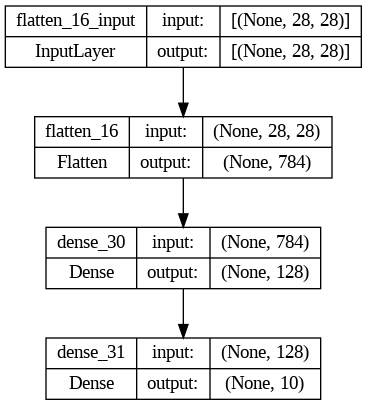

In [ ]:
# @title Build the model and visualise the model graph

#calling both the function one by one

#model = build_model_functional_API()
model = build_model_sequential_API()

#plot the model graph
plot_model(model, show_shapes=True, show_layer_names= True,to_file ='model.png' )



In [ ]:
 # @title Training the model

 #prepare fashion MNIST dataset
mnist = tf.keras.datasets.fashion_mnist

(training_images, training_labels), (test_images, test_labels) = mnist.load_data()

training_images = training_images/255.0
testing_images  = test_images/255.0

#configure , train, and evaluate the model
model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])
model.fit(training_images, training_labels, epochs = 5)
model.evaluate(test_images, test_labels)


Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 2.3024 - accuracy: 0.1003
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 2.3026 - accuracy: 0.1000
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 2.3026 - accuracy: 0.1000
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 2.3026 - accuracy: 0.1000
Epoch 5/5
313/313 [==============================] - 1s 2ms/step - loss: 2.3026 - accuracy: 0.1000


[2.30259108543396, 0.10000000149011612]